In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# датасет P1
data = pd.read_csv(r'C:\Users\Zver\Desktop\ML\data\moldova_cars_task.csv', encoding='utf-8', sep=',')

# Основная информация о датасете (с пропусками и выбросами)

In [3]:
data.sample(5)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
17763,BMW,5 Series,2008.0,Sedan,300000.0,1998.0,Diesel,Automatic,9200.0
8624,Lexus,CT Series,2013.0,Hatchback,170699.0,1800.0,Hybrid,Automatic,13199.0
37668,Seat,Leon,2002.0,Hatchback,1111.0,1111.0,Petrol,Manual,1800.0
29289,Volvo,S40,2010.0,Sedan,142000.0,1800.0,Petrol,Manual,7300.0
31404,Volkswagen,Golf Plus,2015.0,Hatchback,40000.0,1600.0,Diesel,Automatic,4999.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  41007 non-null  object 
 1   Model                 40671 non-null  object 
 2   Year                  40771 non-null  float64
 3   Style                 40938 non-null  object 
 4   Distance              40889 non-null  float64
 5   Engine_capacity(cm3)  41007 non-null  float64
 6   Fuel_type             41007 non-null  object 
 7   Transmission          40779 non-null  object 
 8   Price(euro)           41007 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.8+ MB


In [5]:
data.describe()

,Year,Distance,Engine_capacity(cm3),Price(euro)
count,40771.000000,4.088900e+04,41007.000000,4.100700e+04
mean,2007.979152,4.571171e+05,1853.856732,9.727109e+03
std,8.246369,4.457945e+06,700.364532,5.043926e+04
min,1900.000000,0.000000e+00,0.000000,1.000000e+00
25%,2004.000000,8.700000e+04,1500.000000,3.500000e+03
50%,2009.000000,1.680000e+05,1800.000000,6.600000e+03
75%,2014.000000,2.300000e+05,2000.000000,1.215000e+04
max,2021.000000,1.000000e+08,9999.000000,1.000000e+07


In [6]:
data.nunique()

Make                      87
Model                    829
Year                      75
Style                     12
Distance                8913
Engine_capacity(cm3)     724
Fuel_type                  6
Transmission               2
Price(euro)             1824
dtype: int64

# Заполнение пропущенных значений

In [7]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Model                   0.819372
Year                    0.575511
Transmission            0.556003
Distance                0.287756
Style                   0.168264
Make                    0.000000
Engine_capacity(cm3)    0.000000
Fuel_type               0.000000
Price(euro)             0.000000
dtype: float64

### Как можно было бы заполнить пропущенные значения?
- Transmission можно посмотреть по Make и использовать моду.С Model можно поступить так же.
- Для года можно сгруппировать по модели и марке и взять медиану.
- Для пробега можно сгруппировать по году и использовать медиану.
- Чтобы узнать примерный стиль, можно сгруппировать по Model и взять моду


In [8]:
data['Transmission'] = data.groupby('Make')['Transmission'].transform(lambda x: x.fillna(x.mode()[0]))
data['Model'] = data.groupby('Make')['Model'].transform(lambda x: x.fillna(x.mode()[0]))
data['Year'] = data.groupby(['Make', 'Model'])['Year'].transform(lambda x: x.fillna(x.median()))
data['Distance'] = data.groupby('Year')['Distance'].transform(lambda x: x.fillna(x.median()))
data['Style'] = data.groupby(['Make', 'Model'])['Style'].transform(lambda x: x.fillna(x.mode()[0]))

In [9]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Style                   0
Distance                0
Engine_capacity(cm3)    0
Fuel_type               0
Transmission            0
Price(euro)             0
dtype: int64

# Исправление типов данных

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  41007 non-null  object 
 1   Model                 41007 non-null  object 
 2   Year                  41007 non-null  float64
 3   Style                 41007 non-null  object 
 4   Distance              41007 non-null  float64
 5   Engine_capacity(cm3)  41007 non-null  float64
 6   Fuel_type             41007 non-null  object 
 7   Transmission          41007 non-null  object 
 8   Price(euro)           41007 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.8+ MB


- Можно привести некотореы столбцы с float к типу int

In [11]:
for col in data.columns:
    if data[col].dtype == 'float64':  # Проверяем, является ли тип данных float
        if (data[col] % 1 == 0).all():  # Проверяем, все ли значения в столбце целые
            data[col] = data[col].astype(int)  # Приводим к целочисленному
            print(f"Столбец '{col}' был приведен к типу int.")
        else:
            print(f"Столбец '{col}' содержит нецелые значения и не может быть приведен к типу int.")
    else:
        print(f"Столбец '{col}' не является типом float и не требует приведения к int.")

Столбец 'Make' не является типом float и не требует приведения к int.
Столбец 'Model' не является типом float и не требует приведения к int.
Столбец 'Year' содержит нецелые значения и не может быть приведен к типу int.
Столбец 'Style' не является типом float и не требует приведения к int.
Столбец 'Distance' содержит нецелые значения и не может быть приведен к типу int.
Столбец 'Engine_capacity(cm3)' был приведен к типу int.
Столбец 'Fuel_type' не является типом float и не требует приведения к int.
Столбец 'Transmission' не является типом float и не требует приведения к int.
Столбец 'Price(euro)' был приведен к типу int.


- Столбец 'Year' был приведен к типу int.
- Столбец 'Distance' был приведен к типу int.
- Столбец 'Price(euro)' был приведен к типу int.

In [12]:
data.sample(5)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
23326,Volkswagen,Amarok,2017.0,Pickup,100000.0,2998,Diesel,Automatic,31500
2355,Honda,CR-V,2010.0,SUV,178000.0,2200,Diesel,Automatic,12500
24459,Skoda,Octavia,2013.0,Sedan,201000.0,1600,Metan/Propan,Manual,5600
5216,Ford,Kuga,2018.0,Crossover,143000.0,1500,Diesel,Manual,14750
16240,Hyundai,Santa FE,2006.0,SUV,260000.0,2200,Diesel,Automatic,9000


# Обогащение данных

- Удаление дубликатов

In [13]:
data = data.drop_duplicates()

In [14]:
data.duplicated().sum()

np.int64(0)

# Исследование выбросов

- Посмотрим в целом на данные в столбцах с числовыми данными с помощью диаграммы "ЯЩИК С УСАМИ"

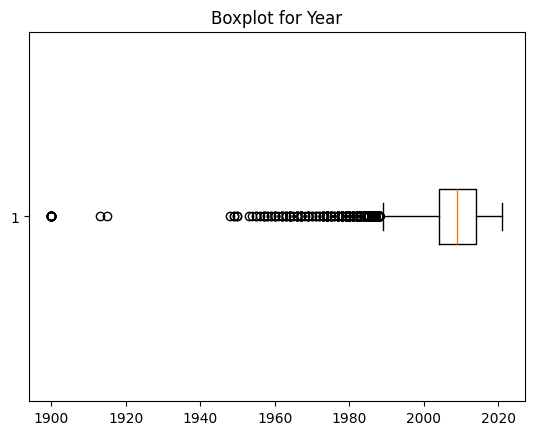

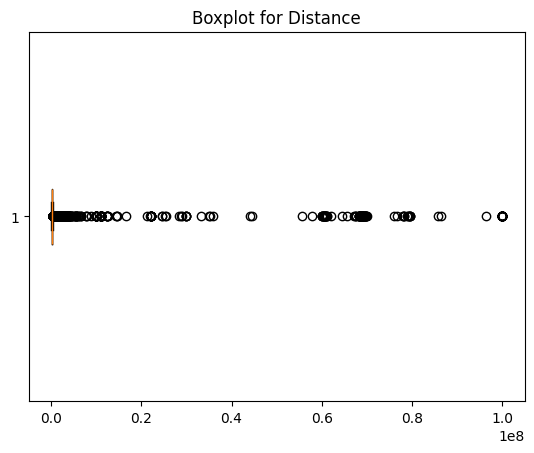

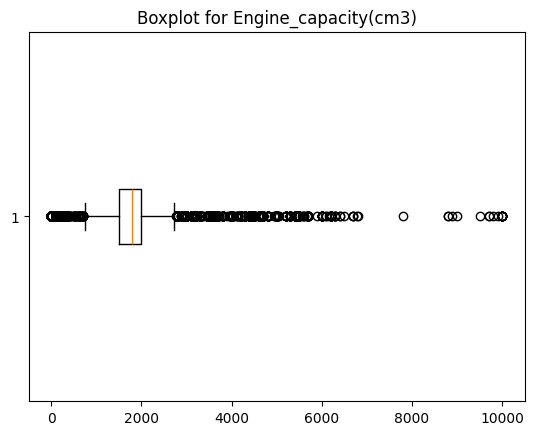

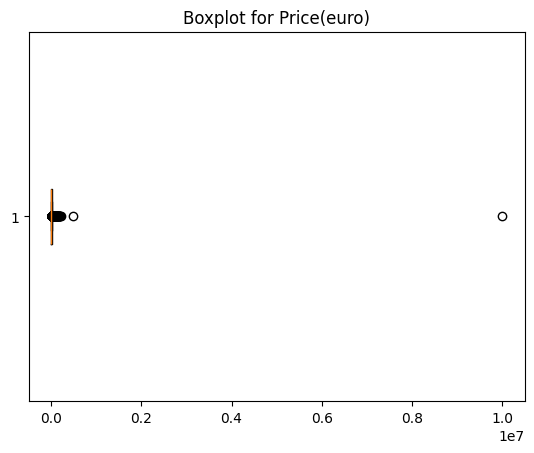

In [15]:
columns = ['Year','Distance','Engine_capacity(cm3)','Price(euro)']
for column in columns:
    plt.figure()
    plt.title(f'Boxplot for {column}')
    plt.boxplot(data[column], vert=False)
    plt.show()

- В кадом столбце есть выбросы

### Удаление выбросов

In [16]:
outlier = data[['Year','Distance','Engine_capacity(cm3)','Price(euro)']]

In [17]:
# Верхие и нижние пределы выбросов
Q1 = outlier.quantile(0.02)
Q3 = outlier.quantile(0.98)

In [18]:
# IQR-оценки
IQR = Q3-Q1
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]

In [19]:
# Копирование индексов
index_list = list(data_filtered.index.values)
data_filtered = data[data.index.isin(index_list)]

In [20]:
data_filtered.describe()

,Year,Distance,Engine_capacity(cm3),Price(euro)
count,36828.000000,3.682800e+04,36828.000000,36828.000000
mean,2007.886689,1.676892e+05,1854.787580,9196.759992
std,7.642995,1.267957e+05,681.395063,9360.822820
min,1948.000000,0.000000e+00,0.000000,1.000000
25%,2004.000000,9.000000e+04,1499.000000,3400.000000
50%,2009.000000,1.690015e+05,1800.000000,6500.000000
75%,2014.000000,2.296028e+05,2000.000000,11850.000000
max,2021.000000,1.288776e+06,7800.000000,95000.000000


- Остались какие-то аномальные значения. Например минимальная емкость двигателя 0 см3...

In [21]:
data_filtered = data_filtered[data_filtered['Engine_capacity(cm3)'] > 543]
data_filtered = data_filtered[data_filtered['Price(euro)'] > 2900]

In [22]:
data_filtered.describe()

,Year,Distance,Engine_capacity(cm3),Price(euro)
count,28558.000000,2.855800e+04,28558.000000,28558.000000
mean,2010.164490,1.645412e+05,1952.197948,11078.897647
std,5.907595,1.149295e+05,653.117563,9608.949701
min,1949.000000,0.000000e+00,555.000000,2950.000000
25%,2007.000000,9.800000e+04,1500.000000,5200.000000
50%,2011.000000,1.670000e+05,1900.000000,7999.000000
75%,2015.000000,2.200000e+05,2200.000000,13500.000000
max,2021.000000,1.243598e+06,7800.000000,95000.000000


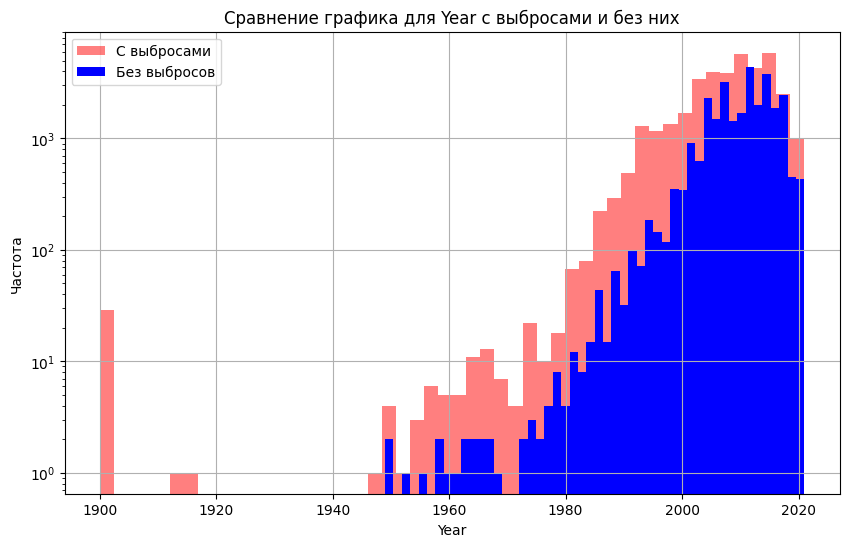

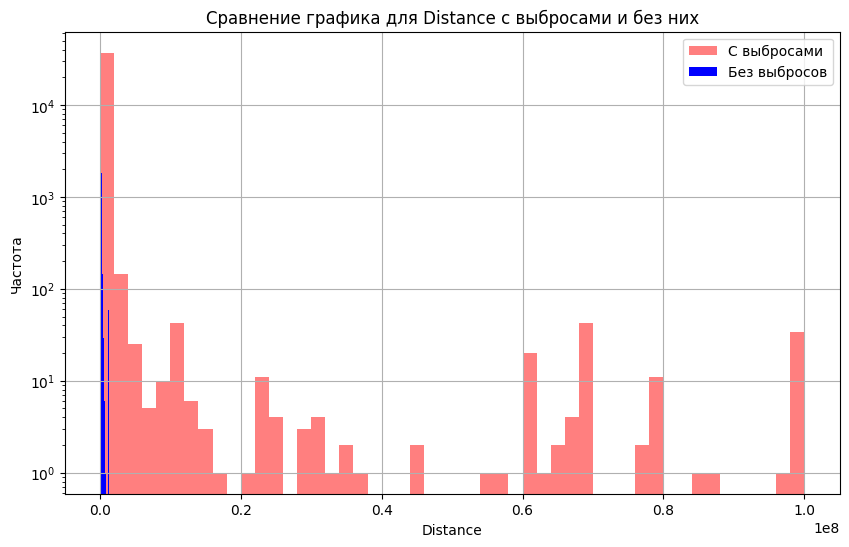

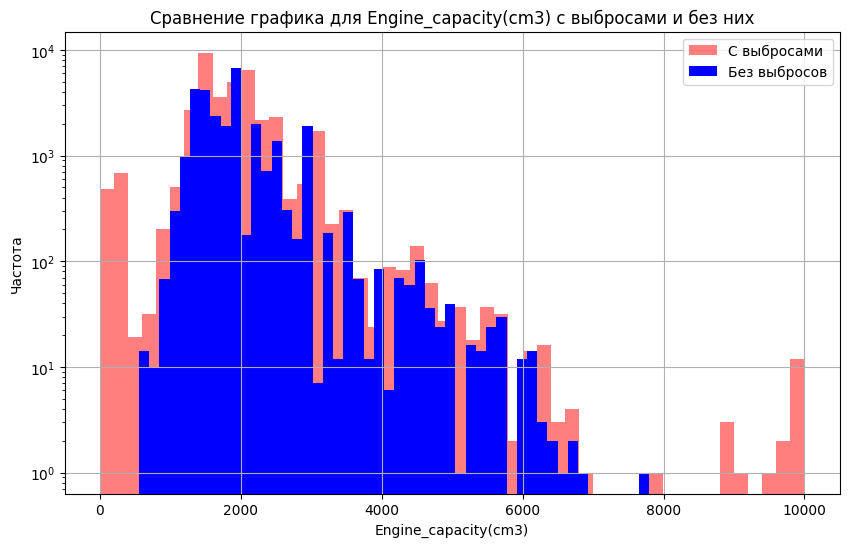

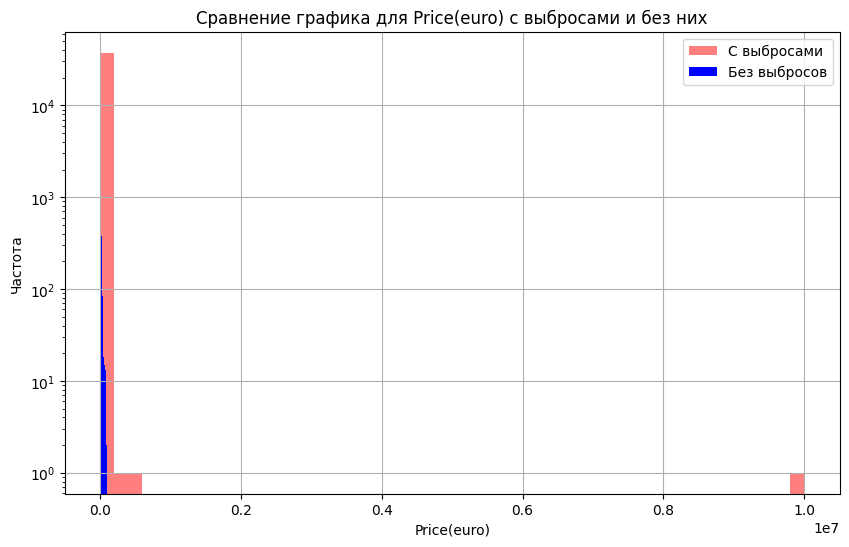

In [23]:
# Сравнение значений с выбросами и без них
columns_to_compare = ['Year','Distance','Engine_capacity(cm3)','Price(euro)']
for col in columns_to_compare:
    plt.figure(figsize=(10, 6)) 
    plt.hist(data[col], bins=50, alpha=0.5, label='С выбросами', log=True, color='red') 
    plt.hist(data_filtered[col], bins=50, label='Без выбросов', log=True, color='blue')  
    plt.title(f'Сравнение графика для {col} с выбросами и без них')
    plt.xlabel(col)
    plt.ylabel('Частота') 
    plt.legend()  
    plt.grid() 
    plt.show()

In [24]:
data_filtered.head(10)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011.0,Hatchback,195000.0,1800,Hybrid,Automatic,7750
1,Renault,Grand Scenic,2014.0,Universal,135000.0,1500,Diesel,Manual,8550
3,Renault,Laguna,2012.0,Universal,110000.0,1500,Diesel,Manual,6550
4,Opel,Astra,2006.0,Universal,200000.0,1600,Metan/Propan,Manual,4100
5,Mercedes,Vito,2000.0,Microvan,300000.0,2200,Diesel,Manual,3490
6,Volkswagen,Passat,2010.0,Universal,290000.0,1390,Petrol,Manual,5600
7,Volkswagen,Touareg,2010.0,SUV,220000.0,2400,Diesel,Automatic,17000
10,Mercedes,E Class,2010.0,Sedan,210000.0,2200,Diesel,Automatic,11400
11,Mercedes,CLS Class,2006.0,Coupe,300000.0,3200,Diesel,Automatic,11800
13,BMW,7 Series,1998.0,Sedan,285000.0,3500,Petrol,Manual,3990


# Анализ параметров

- Проанализируем данные столбцов по самым популярным маркам машин - Toyota и Volkswagen 

In [25]:
data_filtered['Make'].value_counts()

Make
Toyota        3174
Volkswagen    2906
Mercedes      2882
BMW           2467
Renault       2130
              ... 
Saturn           1
Haima            1
Tesla            1
Geely            1
ARO              1
Name: count, Length: 82, dtype: int64

In [26]:
toyota = data_filtered.query('`Make` == "Toyota"')
volkswagen = data_filtered.query('`Make` == "Volkswagen"')

### Анализ категориальных переменных

<Axes: title={'center': 'Price(euro)'}, xlabel='Transmission'>

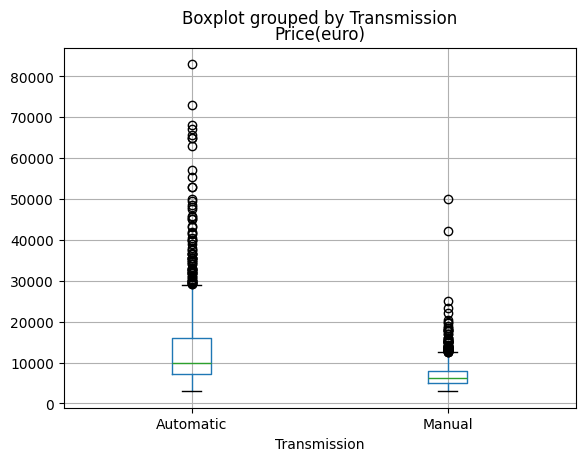

In [27]:
toyota.boxplot(by ='Transmission', column =['Price(euro)'], grid = True)

<Axes: title={'center': 'Price(euro)'}, xlabel='Transmission'>

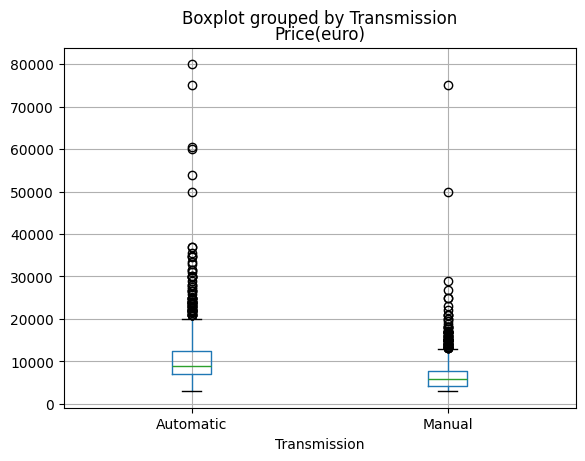

In [28]:
volkswagen.boxplot(by ='Transmission', column =['Price(euro)'], grid = True)

*Тип коробки передач*
- Для toyota и volkswagen машины с автоматической коробкой передач дороже, чем с механической коробкой передач.
- Для toyota в среднем цена за машину с автоматической коробкой передач составляет 10 тыс евро, для volkswagen чуть меньше 10 тыс евро.
- Для toyota и для volkswagen с механическом коробкой передач средняя цена примерно одинакова - примерно 5 тыс евро.
- Есть выбросы.

<Axes: title={'center': 'Price(euro)'}, xlabel='Fuel_type'>

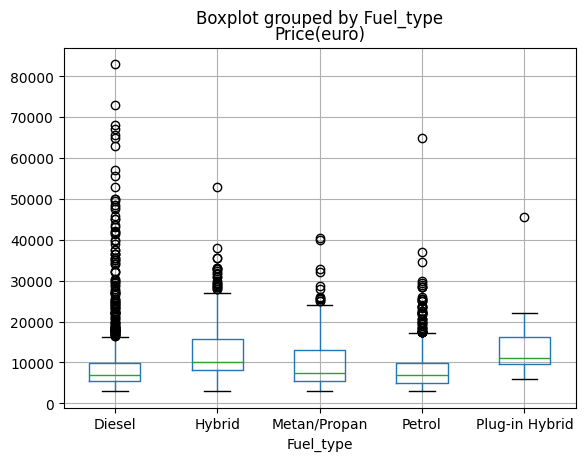

In [29]:
toyota.boxplot(by ='Fuel_type', column =['Price(euro)'], grid = True)

<Axes: title={'center': 'Price(euro)'}, xlabel='Fuel_type'>

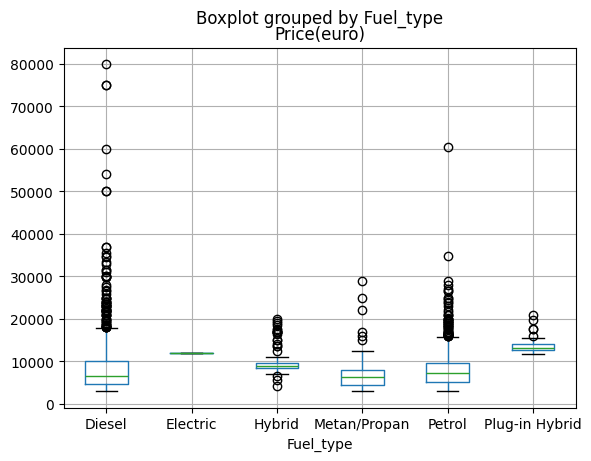

In [30]:
volkswagen.boxplot(by ='Fuel_type', column =['Price(euro)'], grid = True)

*Тип топлива*
- Для toyota самая дорогая машина с типом гибрид, для volkswagen самые дорогие - бензин, дизель.
- Есть выбросы.

<Axes: title={'center': 'Price(euro)'}, xlabel='Style'>

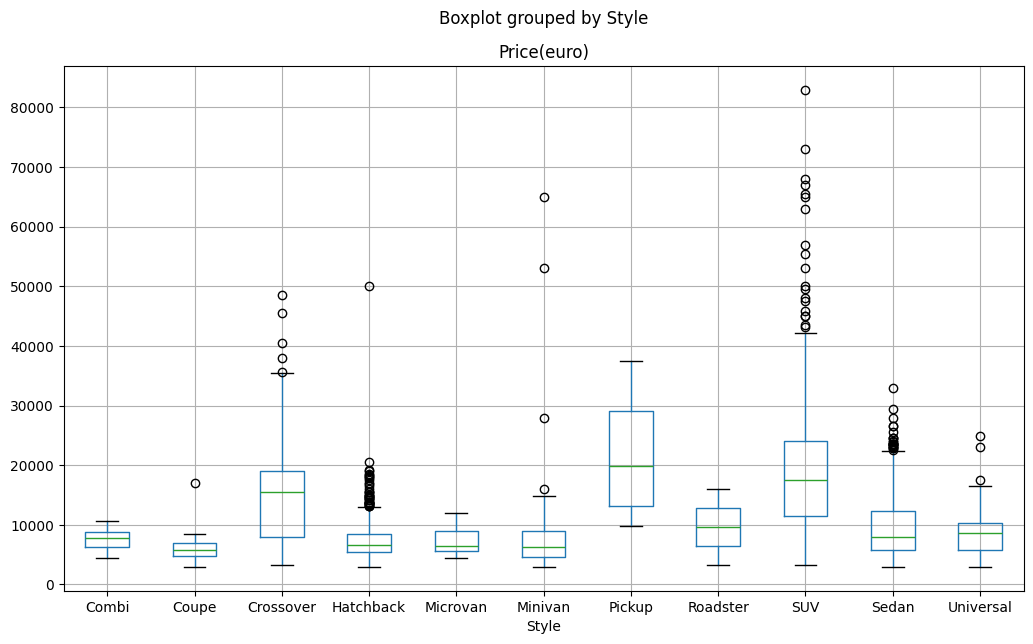

In [31]:
toyota.boxplot(by ='Style', column =['Price(euro)'], figsize=(12,7), grid = True)

<Axes: title={'center': 'Price(euro)'}, xlabel='Style'>

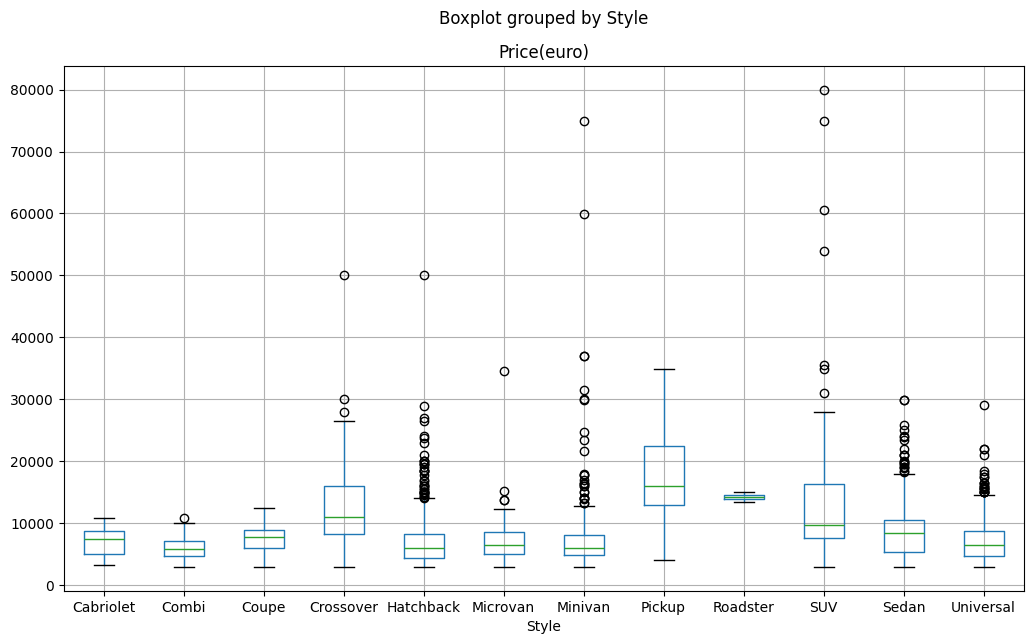

In [32]:
volkswagen.boxplot(by ='Style', column =['Price(euro)'], figsize=(12,7), grid = True)

*Стиль машины*
- Для toyota самая дорогая машина стиля SUV, для volkswagen так же.
- Для toyota самая дешевая машина стилей Hatchback, Sedan.
- Для toyota все стили машин стоят примерно в одном ценовом сегменте, кроме Pickup, SUV - они будут дороже.
- Для volkswagen все стили машин стоят примерно до 10 тыс евро, кроме Crossover, Pickup, SUV.
- Есть выбросы.

### Статистическая значимость параметров

In [33]:
toyota['Transmission'] = toyota['Transmission'].map({'Automatic': 1, 'Manual': 0})


C:\Users\Zver\AppData\Local\Temp\ipykernel_4268\3067959317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toyota['Transmission'] = toyota['Transmission'].map({'Automatic': 1, 'Manual': 0})


In [34]:
from scipy.stats import pointbiserialr
pointbiserialr(toyota['Transmission'], toyota['Price(euro)'])

SignificanceResult(statistic=np.float64(0.3996727799731197), pvalue=np.float64(4.6805609677900674e-122))

### Анализ числовых переменных

- Диаграммы рассеяния для столбцов

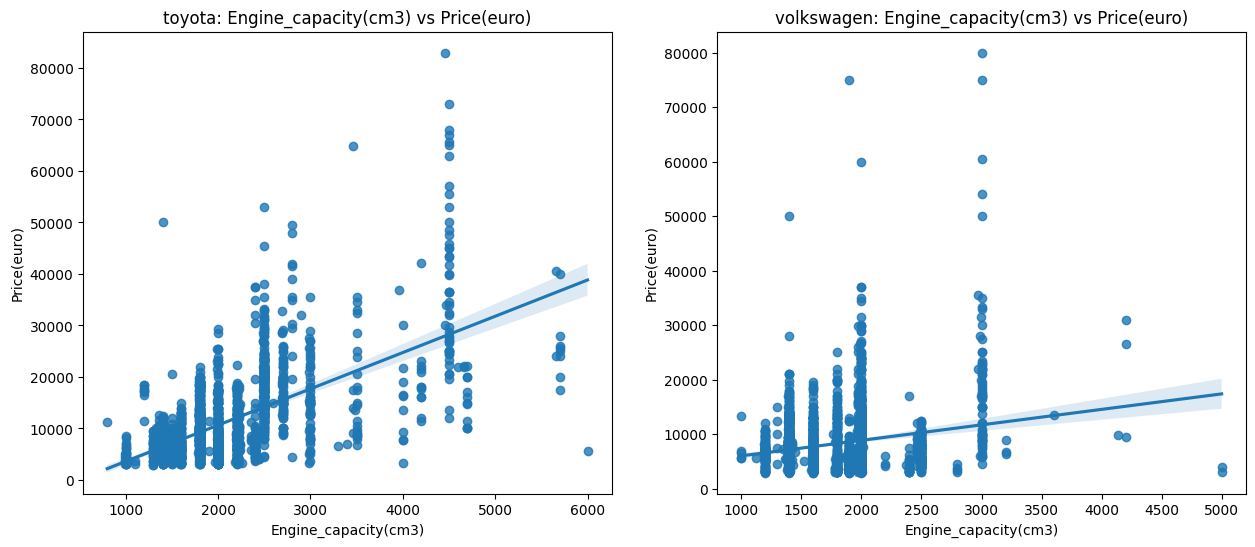

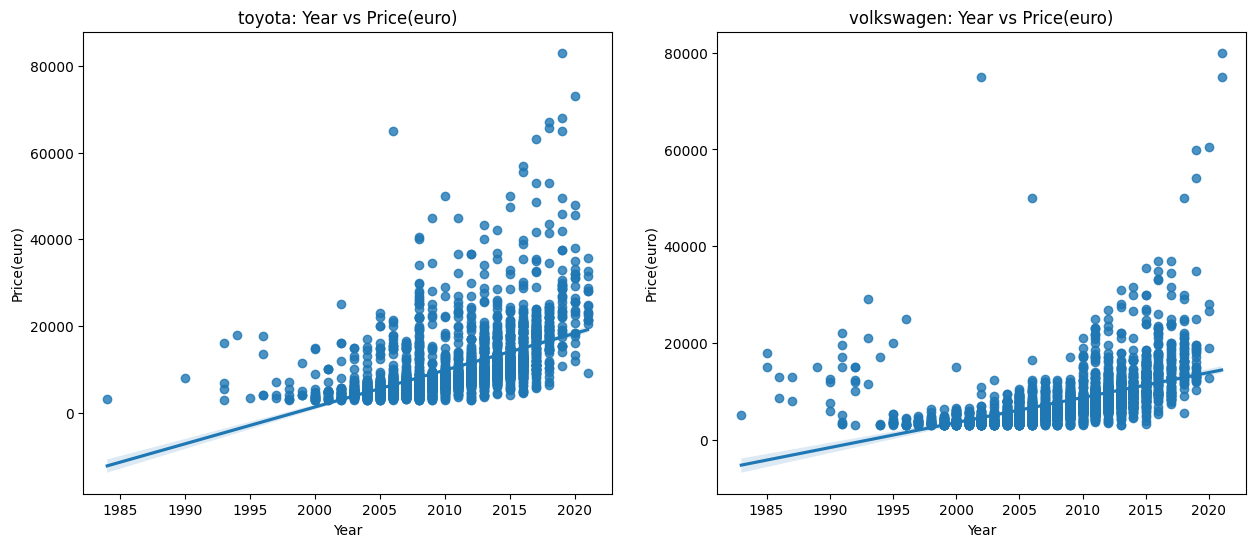

In [35]:
comparisons = [
    ("Engine_capacity(cm3)", "Price(euro)", "Engine_capacity(cm3)", "Price(euro)"),
    ("Year", "Price(euro)", "Year", "Price(euro)")
]

for x_col, y_col, x_label, y_label in comparisons:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 
    
    # График для toyota
    sns.regplot(x=x_col, y=y_col, data=toyota, ax=axes[0])
    axes[0].set_title(f'toyota: {x_label} vs {y_label}')
    axes[0].set_xlabel(x_label)
    axes[0].set_ylabel(y_label)
    
    # График для volkswagen
    sns.regplot(x=x_col, y=y_col, data=volkswagen, ax=axes[1])
    axes[1].set_title(f'volkswagen: {x_label} vs {y_label}')
    axes[1].set_xlabel(x_label)
    axes[1].set_ylabel(y_label)
    
    plt.show()

In [36]:
variable_pairs = [
    ("Engine_capacity(cm3)", "Price(euro)"),
    ("Year", "Price(euro)")
]

for var1, var2 in variable_pairs:
    # Корреляция toyota
    y1 = toyota[[var1, var2]]
    y1_corr = y1.corr(method='spearman')
    print(f"Корреляция для toyota:\n{y1_corr}\n")
    
    # Корреляция для volkswagen
    n1 = volkswagen[[var1, var2]]
    n1_corr = n1.corr(method='spearman')
    print(f"Корреляция для volkswagen:\n{n1_corr}\n")

Корреляция для toyota:
                      Engine_capacity(cm3)  Price(euro)
Engine_capacity(cm3)              1.000000     0.506722
Price(euro)                       0.506722     1.000000

Корреляция для volkswagen:
                      Engine_capacity(cm3)  Price(euro)
Engine_capacity(cm3)              1.000000     0.087165
Price(euro)                       0.087165     1.000000

Корреляция для toyota:
                 Year  Price(euro)
Year         1.000000     0.725653
Price(euro)  0.725653     1.000000

Корреляция для volkswagen:
                 Year  Price(euro)
Year         1.000000     0.742886
Price(euro)  0.742886     1.000000



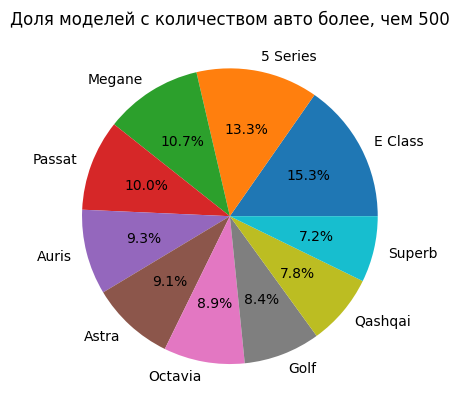

In [37]:
counts = data_filtered.Model.value_counts()
makes_with_more_than_500 = counts[counts > 500]
plt.figure()  
plt.pie(makes_with_more_than_500, labels=makes_with_more_than_500.index, autopct='%1.1f%%')
plt.title('Доля моделей с количеством авто более, чем 500')
plt.show()

- E Class, 5 Series самые популярные модели машин.

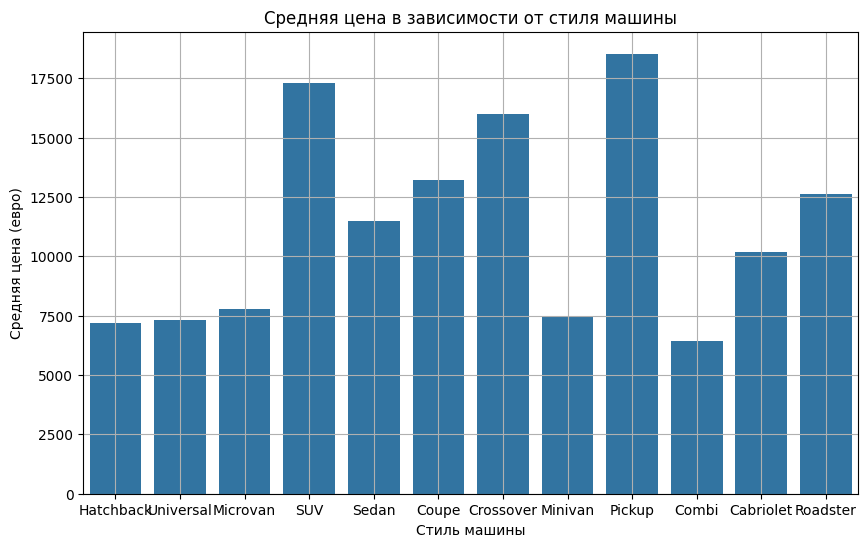

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Style', y='Price(euro)', data=data_filtered, estimator='mean', errorbar=None)
plt.title('Средняя цена в зависимости от стиля машины')
plt.xlabel('Стиль машины')
plt.ylabel('Средняя цена (евро)')
plt.grid()
plt.show()

- Машины стиля Pickup, SUV самые дорогие, а Combi самая дешевая.

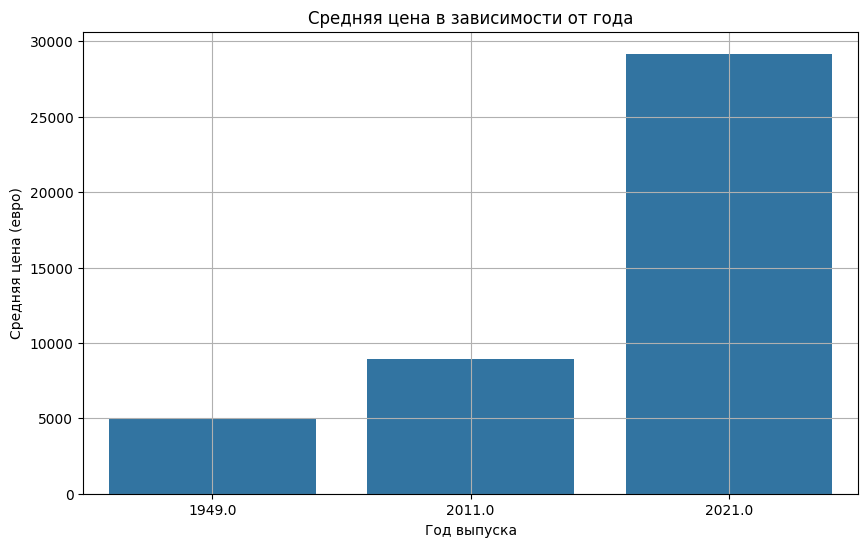

In [39]:
# Средние цены в зависимости от года
min_year = data_filtered['Year'].min()
max_year = data_filtered['Year'].max()
mid_year = data_filtered['Year'].median()
selected_years = data_filtered[data_filtered['Year'].isin([min_year, mid_year, max_year])]

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Price(euro)', data=selected_years, estimator='mean', errorbar=None)
plt.title('Средняя цена в зависимости от года')
plt.xlabel('Год выпуска')
plt.ylabel('Средняя цена (евро)')
plt.grid()
plt.show()

- 1949 год цены не больше 5 тыс евро, за 2010 год цены до 10 тыс евро,за 2021 год цены до 30 тыс евро.

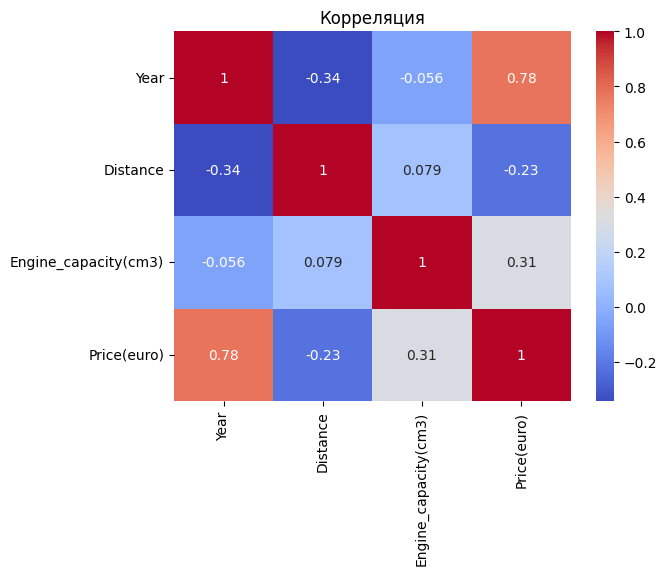

In [40]:
# Корреляция числовых данных
corr = data[['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)']].corr(method='spearman')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляция')
plt.show()

### Статистическая значимость

In [41]:
from scipy import stats
r = stats.spearmanr(data_filtered['Engine_capacity(cm3)'], data_filtered['Price(euro)'])
print('Корреляция:', r[0], 'p-value:', r[1])

Корреляция: 0.3527539244378941 p-value: 0.0


In [42]:
r = stats.spearmanr(data_filtered['Year'], data_filtered['Price(euro)'])
print('Корреляция:', r[0], 'p-value:', r[1])

Корреляция: 0.6775939393853618 p-value: 0.0


- Так как p-value < 0.05, то делаем вывод о том,что взаимосвязь между параметрами статистически значима

# Кодирование столбцов

In [43]:
data_filtered['Transmission'] = data_filtered['Transmission'].map({'Automatic': 1, 'Manual': 0})

In [44]:
import pandas as pd

# Преобразование всех булевых значений в 0 и 1
data_filtered_ohe = pd.get_dummies(data_filtered).astype(int)

# Сохранение
data_filtered_ohe.to_csv(
    r'C:\Users\Zver\Desktop\ML\data\moldova_cars_task_filtered_ohe.csv', 
    sep=',', 
    encoding='utf-8',
    index=False
)

# Проверяем результат
print(data_filtered_ohe.sample(3))

       Year  Distance  Engine_capacity(cm3)  Transmission  Price(euro)  \
16213  2007        58                  1394             1         4500   
30278  2009         0                  1400             0         6900   
11189  2012    204000                  1796             1        14999   

       Make_ARO  Make_Abarth  Make_Acura  Make_Alfa Romeo  Make_Alta marca  \
16213         0            0           0                0                0   
30278         0            0           0                0                0   
11189         0            0           0                0                0   

       ...  Style_Roadster  Style_SUV  Style_Sedan  Style_Universal  \
16213  ...               0          0            0                0   
30278  ...               0          0            0                0   
11189  ...               0          0            1                0   

       Fuel_type_Diesel  Fuel_type_Electric  Fuel_type_Hybrid  \
16213                 1                 

In [45]:
!pip install category_encoders
from category_encoders.binary import BinaryEncoder

You should consider upgrading via the 'C:\Users\Zver\Desktop\machine_learning\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [46]:
bn = BinaryEncoder()
data_filtered_bne = data_filtered.copy()
data_filtered_bne = bn.fit_transform(data_filtered.values)
data_filtered_bne.sample(5)

,0_0,0_1,0_2,0_3,0_4,0_5,0_6,1_0,1_1,1_2,...,8_1,8_2,8_3,8_4,8_5,8_6,8_7,8_8,8_9,8_10
1750,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,0
10553,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
19809,0,1,0,1,0,1,1,0,1,1,...,0,1,0,0,0,0,0,1,1,0
13907,0,0,1,0,0,0,0,0,1,0,...,0,0,1,1,0,1,1,0,0,0
9214,0,0,1,1,1,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0


In [47]:
data_filtered_bne.to_csv(r'C:\Users\Zver\Desktop\ML\data\moldova_cars_task_filtered_bne.csv', sep=',', encoding='utf-8')

# Заключение
*Этот проект призван изучить полученные данные о машинах в Молдове, собранные за последние несколько лет, и определить, какие факторы влияют на цену машины.* 

#### Столбцы датасета:
- Make Марка	 
- Model Модель  
- Year Год	  
- Style Стиль  
- Distance Пробег  
- Engine_capacity(cm3) Объем двигателя	 
- Fuel_type Тип топлива	  
- Transmission Коробка передач   
- Price(euro) Цена

#### ПЕРВОНАЧАЛЬНАЯ информация из функций describe, info:
- Типы float64 - 4, object - 5
- 41007 строк, 9 столбцов
- Выбросы: в данных присутствуют выбросы, особенно в столбцах Distance и Price(euro) (например, пробег 100 млн км, цена 10 млн евро). Средний пробег составляет 457,117 км, но медиана 168,000 км значительно меньше, что указывает на наличие выбросов. Средняя цена - 9,727 евро, но медиана 6,600 евро значительно ниже, что также указывает на выбросы.. Нулевые значения в Distance и Engine_capacity(cm3) могут указывать на ошибки в данных.
- Распределение данных: большинство автомобилей выпущены между 2004 и 2014 годами.
- Пропуски: количество записей в столбцах Distance, Engine_capacity(cm3) и Price(euro) немного меньше, чем в Year, что может указывать на пропущенные значения.

#### Столбцы с пропущенными значениями и как они были заполнены:
- Transmission можно посмотреть по Make и использовать моду.С Model можно поступить так же.
- Для года можно сгруппировать по модели и марке и взять медиану.
- Для пробега можно сгруппировать по году и использовать медиану.
- Чтобы узнать примерный стиль, можно сгруппировать по Model и взять моду

#### Изменение типов данных:
- Столбец 'Year' был приведен к типу int.
- Столбец 'Distance' был приведен к типу int.
- Столбец 'Engine_capacity(cm3)' был приведен к типу int.
- Столбец 'Price(euro)' был приведен к типу int.

#### Редактирование данных:
- Добавлен возраст машины - столбец Age.
- Проверка дублированных данных и их удаление.

#### Проверка и удаление выбросов:
- Были выбраны основные столбцы для исследования: 'Year','Distance','Engine_capacity(cm3)','Price(euro)','Age'. Выбросы есть в каждом из этих столбцов, в этом можно убедиться, посмотрев на диаграммы boxplots.
- Выбросы были удалены с помощью метода межквартильного размаха: вычеслены верхние и нижние пределы выбросов, IQR оценки. После данного метода остались явные выбросы, они были удалены самостоятельно.

#### Изучение данных
##### Изучение ценового фактора для самых поппулярных марок Toyota, Volkswagen.
Взяты две популярных марки Toyota, Volkswagen.

**Результат:**

*Тип коробки передач*
- Для toyota и volkswagen машины с автоматической коробкой передач дороже, чем с механической коробкой передач.
- Для toyota в среднем цена за машину с автоматической коробкой передач составляет 10 тыс евро, для volkswagen чуть меньше 10 тыс евро.
- Для toyota и для volkswagen с механическом коробкой передач средняя цена примерно одинакова - примерно 5 тыс евро.
- Есть выбросы.
 
*Тип топлива*
- Для toyota самая дорогая машина с типом гибрид, для volkswagen самые дорогие - бензин, дизель.
- Есть выбросы.
 
*Стиль машины*
- Для toyota самая дорогая машина стиля SUV, для volkswagen так же.
- Для toyota самая дешевая машина стилей Hatchback, Sedan.
- Для toyota все стили машин стоят примерно в одном ценовом сегменте, кроме Pickup, SUV - они будут дороже.
- Для volkswagen все стили машин стоят примерно до 10 тыс евро, кроме Crossover, Pickup, SUV.
- Есть выбросы.

*Объем аккумулятора*
- Toyota: видно, что цена зависит от объема двигателя, корреляция положительная, есть выбросы. 
- Volkswagena: видно, что цена зависит от объема двигателя, корреляция положительная, но чуть меньше чем у предыдущей марки, также есть выбросы.

*Год*
Использовалась диаграмма рассеяния. Для toyota и volkswagen видим, что зависимость между переменными присутствует, корреляция положительная. Есть выбросы.

##### Изучение данных для всех марок машин
1. Доля марок с количеством авто более, чем 500. Использовалась круговая диаграмма.
**Результат:**
E Class, 5 Series самые популярные модели машин.

2. Срелняя цена в зависимости от стиля машины.
**Результат:**
Машины стиля Pickup, SUV самые дорогие, а Combi самая дешевая.

3. Средняя цена в зависимости от года выпуска.
**Результат:**
Взяты минимальный год, медианный год и самый последний. 1949 год цены не больше 5 тыс евро, за 2010 год цены до 10 тыс евро. за 2021 год цены до 30 тыс евро.